**Домашнее задание**
Где дешевле жить? Предсказание цен в Airbnb - учимся генерировать признаки и интерпретировать результаты модели

**Цель:**
В этом проекте вы потренируетесь строить интерпретируемые модели линейной регрессии с регуляризацией и без, а также придумывать новые признаки для
улучшения качества модели.


# Часть 1 

![title](New_York_City2.gif)

## Загрузка данных

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('AB_NYC_2019.csv')

In [5]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [6]:
df = df.drop(['id', 'name', 'host_id', 'host_name', 'last_review','number_of_reviews','reviews_per_month',],axis=1)
df

neighbourhood_group       neighbourhood  latitude  longitude  \
0                Brooklyn          Kensington  40.64749  -73.97237   
1               Manhattan             Midtown  40.75362  -73.98377   
2               Manhattan              Harlem  40.80902  -73.94190   
3                Brooklyn        Clinton Hill  40.68514  -73.95976   
4               Manhattan         East Harlem  40.79851  -73.94399   
...                   ...                 ...       ...        ...   
48890            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
48891            Brooklyn            Bushwick  40.70184  -73.93317   
48892           Manhattan              Harlem  40.81475  -73.94867   
48893           Manhattan      Hell's Kitchen  40.75751  -73.99112   
48894           Manhattan      Hell's Kitchen  40.76404  -73.98933   

             room_type  price  minimum_nights  calculated_host_listings_count  \
0         Private room    149               1                               6   
1      Entire home/apt    225               1                               2   
2         Private room    150               3                               1   
3      Entire home/apt     89               1                               1   
4      Entire home/apt     80              10                               1   
...                ...    ...             ...                             ...   
48890     Private room     70               2                               2   
48891     Private room     40               4                               2   
48892  Entire home/apt    115              10                               1   
48893      Shared room     55               1                               6   
48894     Private room     90               7                               1   

       availability_365  
0                   365  
1                   355  
2                   365  
3                   194  
4                     0  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[48895 rows x 9 columns]

In [7]:
df.describe()

latitude     longitude         price  minimum_nights  \
count  48895.000000  48895.000000  48895.000000    48895.000000   
mean      40.728949    -73.952170    152.720687        7.029962   
std        0.054530      0.046157    240.154170       20.510550   
min       40.499790    -74.244420      0.000000        1.000000   
25%       40.690100    -73.983070     69.000000        1.000000   
50%       40.723070    -73.955680    106.000000        3.000000   
75%       40.763115    -73.936275    175.000000        5.000000   
max       40.913060    -73.712990  10000.000000     1250.000000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   calculated_host_listings_count  48895 non-null  int64  
 8   availability_365                48895 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 3.4+ MB


In [9]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [10]:
neighbourhood_group = df['neighbourhood_group'].unique().tolist()
neighbourhood_group

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [11]:
neighbourhood = df['neighbourhood'].unique().tolist()
neighbourhood

['Kensington',
 'Midtown',
 'Harlem',
 'Clinton Hill',
 'East Harlem',
 'Murray Hill',
 'Bedford-Stuyvesant',
 "Hell's Kitchen",
 'Upper West Side',
 'Chinatown',
 'South Slope',
 'West Village',
 'Williamsburg',
 'Fort Greene',
 'Chelsea',
 'Crown Heights',
 'Park Slope',
 'Windsor Terrace',
 'Inwood',
 'East Village',
 'Greenpoint',
 'Bushwick',
 'Flatbush',
 'Lower East Side',
 'Prospect-Lefferts Gardens',
 'Long Island City',
 'Kips Bay',
 'SoHo',
 'Upper East Side',
 'Prospect Heights',
 'Washington Heights',
 'Woodside',
 'Brooklyn Heights',
 'Carroll Gardens',
 'Gowanus',
 'Flatlands',
 'Cobble Hill',
 'Flushing',
 'Boerum Hill',
 'Sunnyside',
 'DUMBO',
 'St. George',
 'Highbridge',
 'Financial District',
 'Ridgewood',
 'Morningside Heights',
 'Jamaica',
 'Middle Village',
 'NoHo',
 'Ditmars Steinway',
 'Flatiron District',
 'Roosevelt Island',
 'Greenwich Village',
 'Little Italy',
 'East Flatbush',
 'Tompkinsville',
 'Astoria',
 'Clason Point',
 'Eastchester',
 'Kingsbridge',


# Первоночальный анализ данных
## Гистограмма

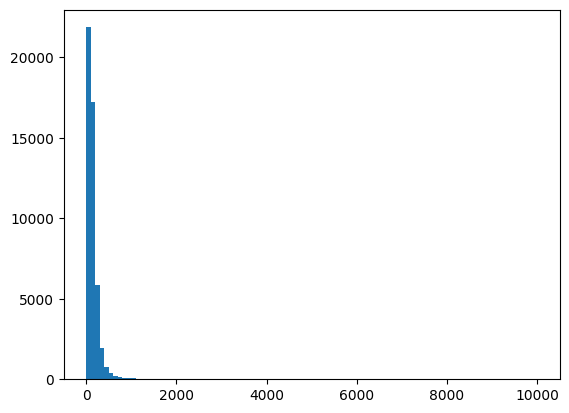

In [16]:
hist=plt.hist(df['price'],bins=100)

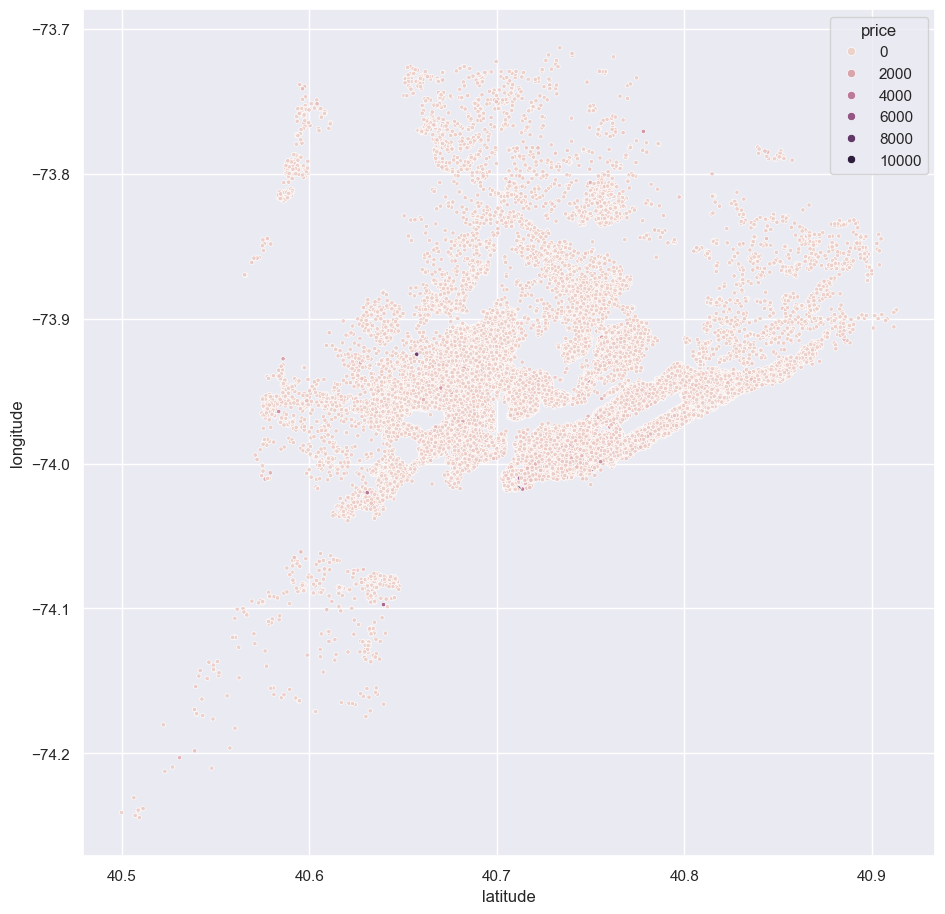

In [26]:
sns.set_theme(rc={'figure.figsize':(11,11)})
ax=sns.scatterplot(data=df, x="latitude", y="longitude", hue="price")
ax.collections[0].set_sizes([10])

## Вывод №1
Имеются выбросы в данных, требуется фильтрация данных

## Начальная предобработка данных

In [110]:
q98 = df['price'].quantile(0.98)

In [111]:
df2 = df.loc[df['price']<=q98]
df2

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  price_std  
0                   365  -0.015493  
1                   355   0.300974  
2                   365  -0.011329  
3                   194  -0.265335  
4                     0  -0.302811  
...                 ...        ...  
48890                 9  -0.344452  
48891                36  -0.469373  
48892           

## Цветовая визуализация данных по районам и ценам на комнты

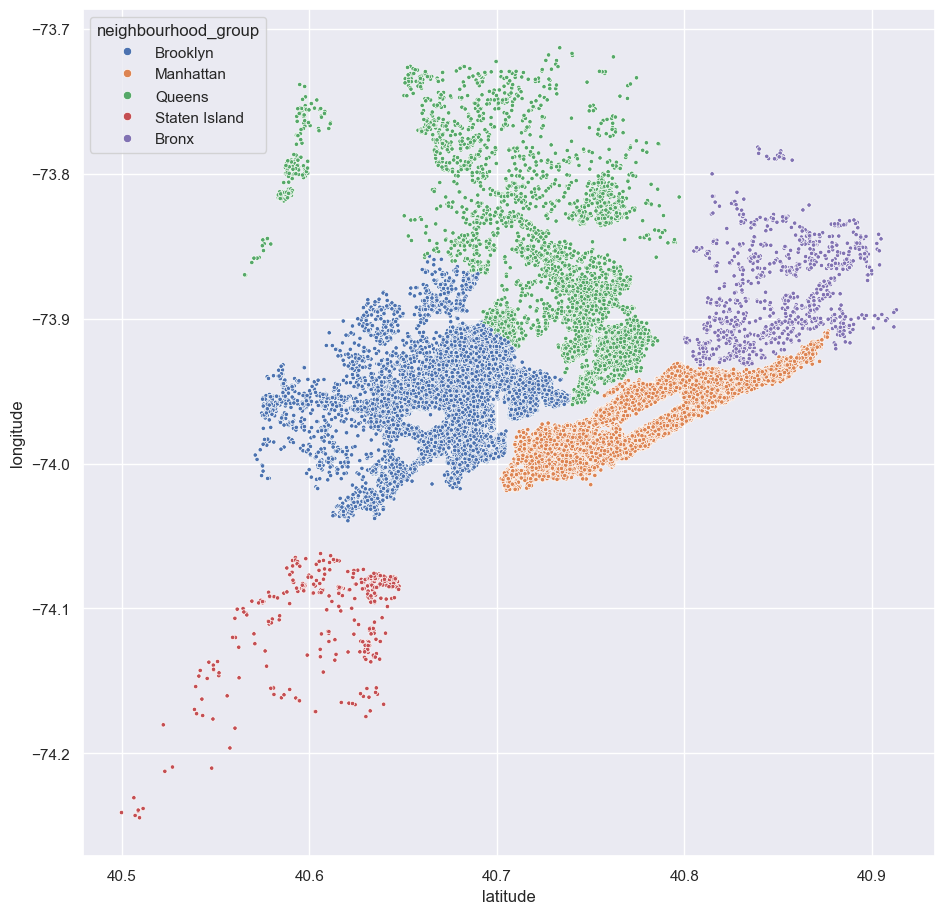

In [112]:
sns.set_theme(rc={'figure.figsize':(11,11)})
ax=sns.scatterplot(data=df2, x="latitude", y="longitude", hue="neighbourhood_group")
ax.collections[0].set_sizes([10])

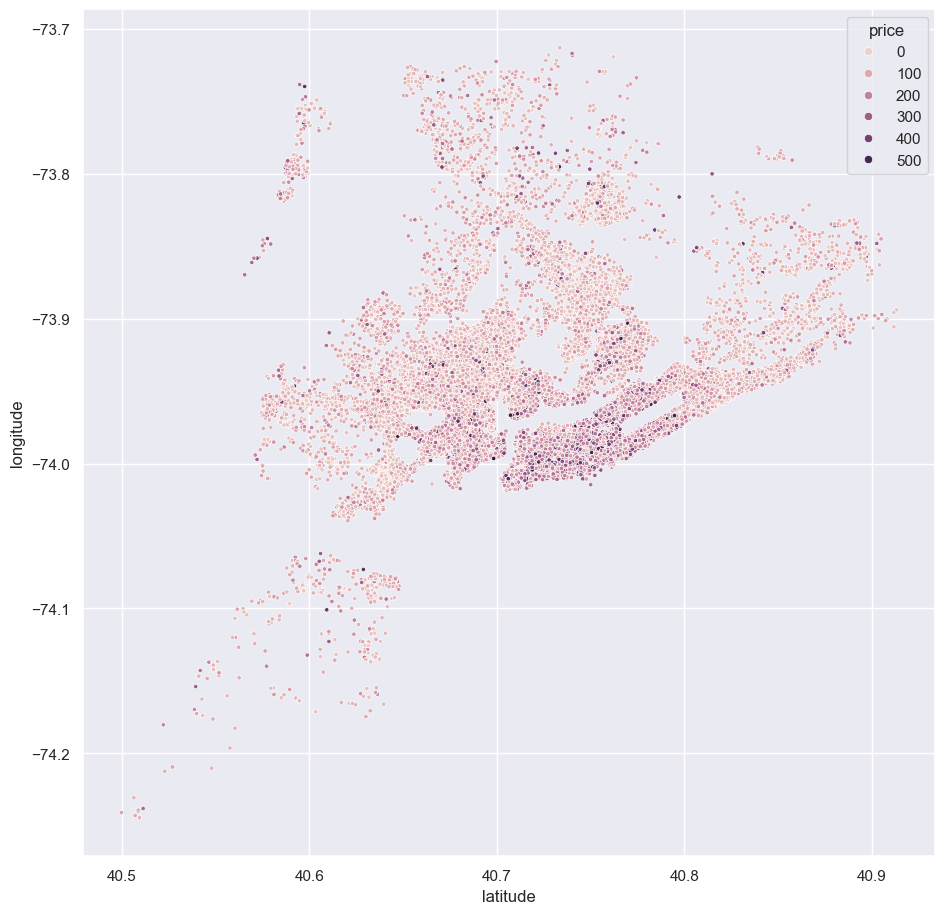

In [113]:
sns.set_theme(rc={'figure.figsize':(11,11)})
ax=sns.scatterplot(data=df2, x="latitude", y="longitude", hue="price")
ax.collections[0].set_sizes([10])

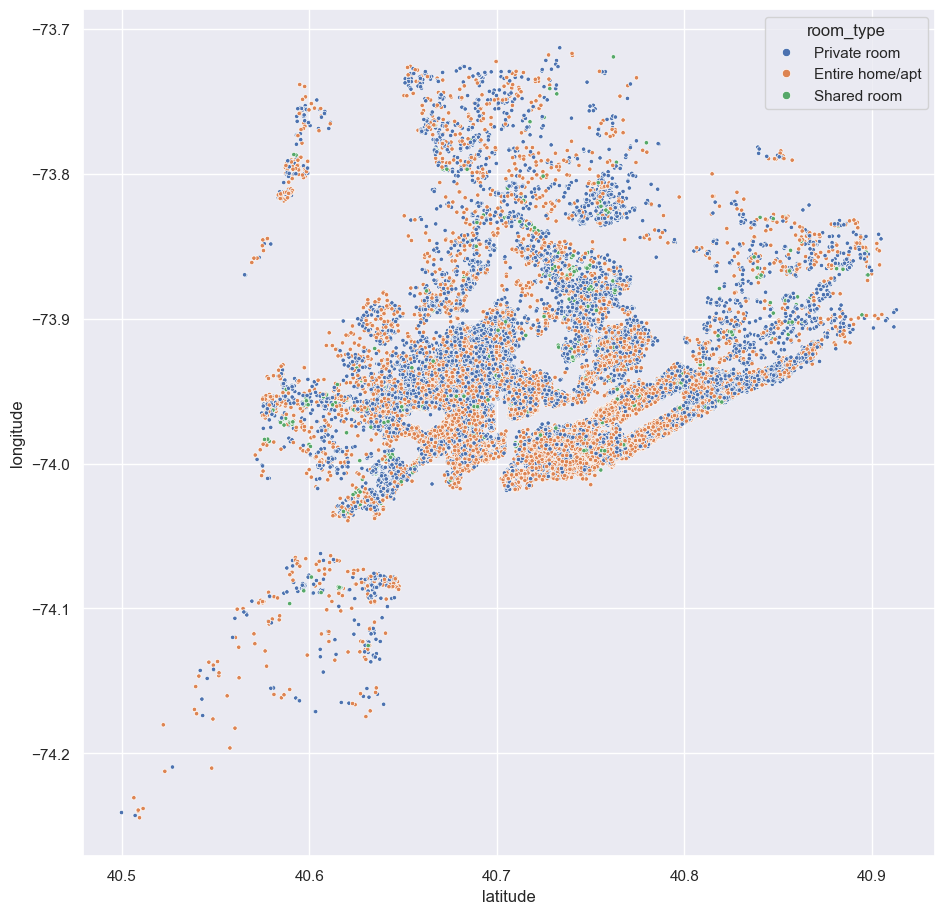

In [37]:
sns.set_theme(rc={'figure.figsize':(11,11)})
ax=sns.scatterplot(data=df2, x="latitude", y="longitude", hue="room_type")
ax.collections[0].set_sizes([10])

## Плотность распределения по типам комнат на карте Нью-Йорка

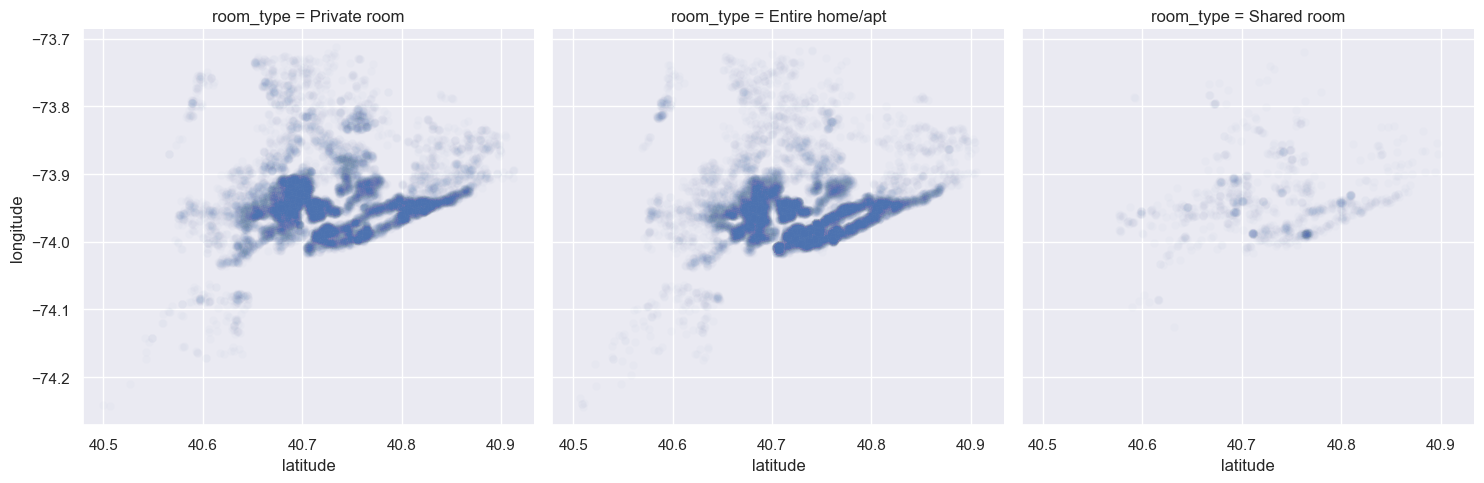

In [57]:
sns.set_theme(rc={'figure.figsize':(11,11)})
sns.relplot(
    data=df2, x="latitude", y="longitude",
    col="room_type",
    kind="scatter",alpha = .02
)
# ax=sns.scatterplot(data=df2, x="latitude", y="longitude", hue="Private room")
ax.collections[0].set_sizes([10])

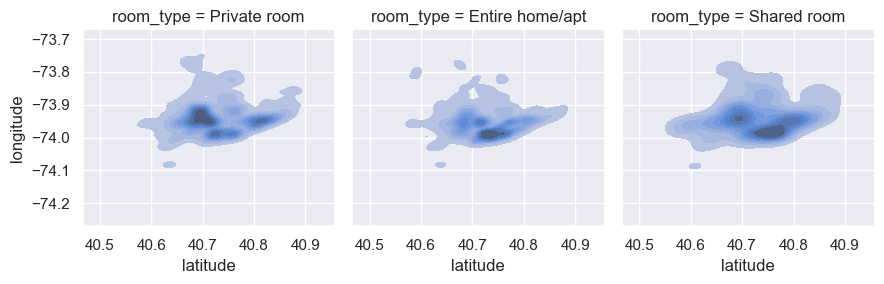

In [56]:
sea = sns.FacetGrid(df2, col = "room_type")
sea.map(sns.kdeplot, "latitude", "longitude", fill=True, alpha = 1.0)

<Axes: xlabel='room_type', ylabel='price'>

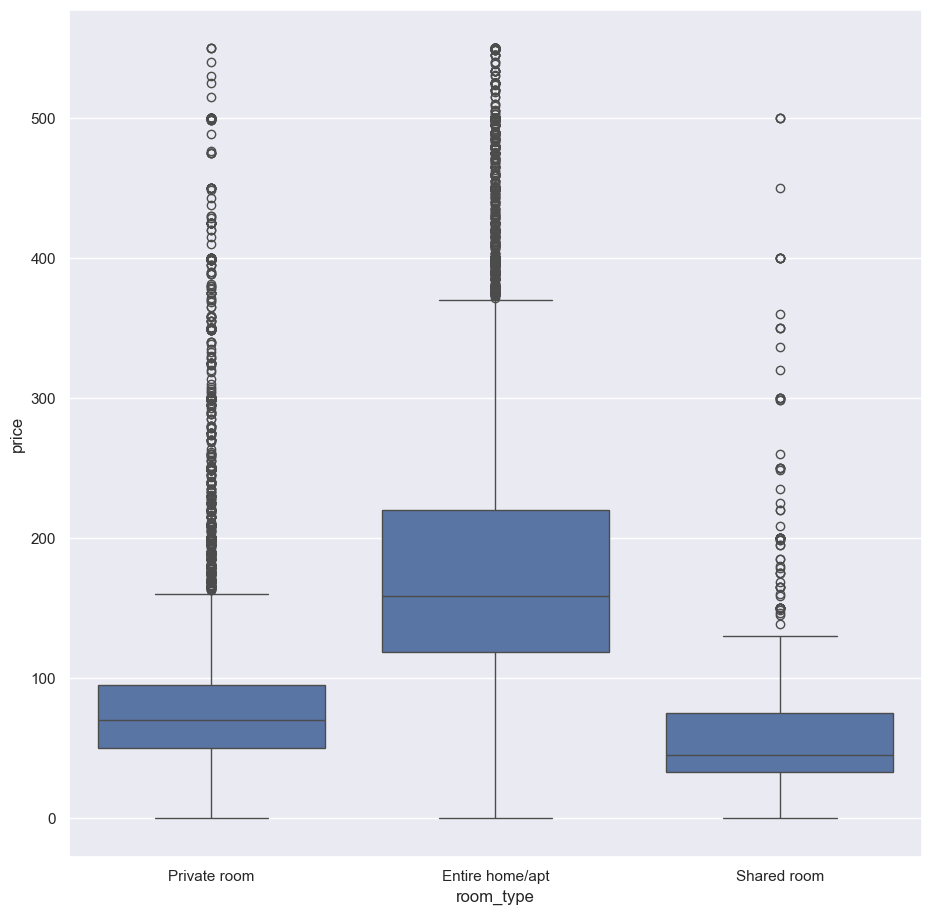

In [39]:
sns.boxplot(x = df2['room_type'] , y = df['price']) 

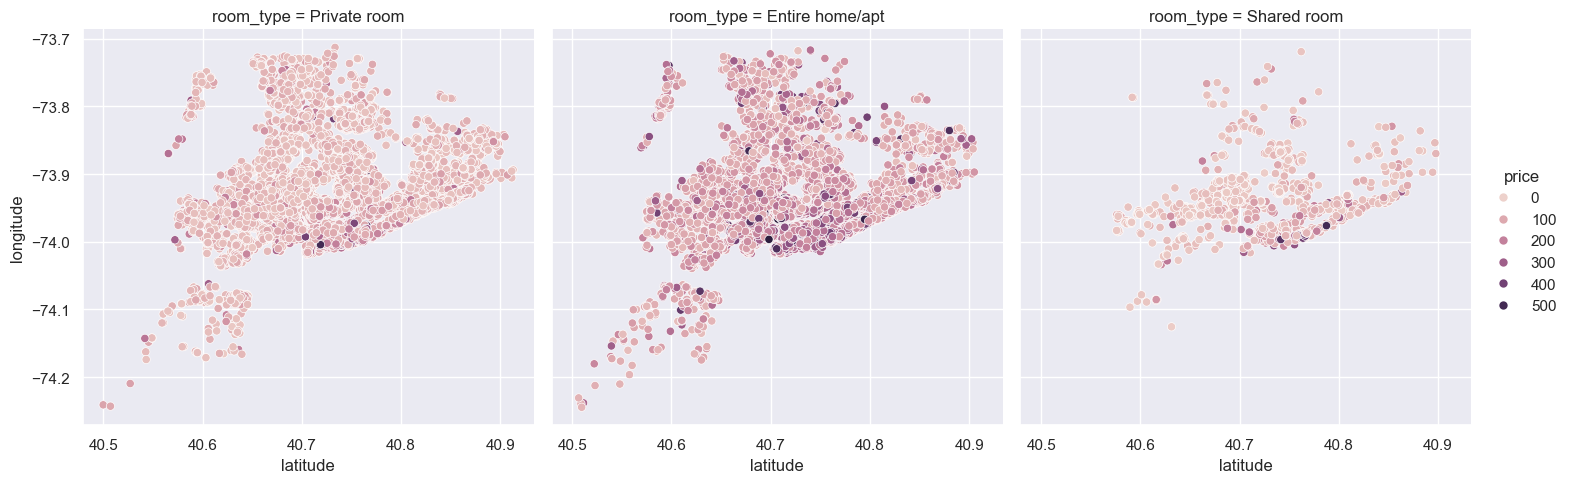

In [63]:
sns.relplot(
    data=df2, x="latitude", y="longitude",
    col="room_type",
    kind="scatter",
    hue="price"
)

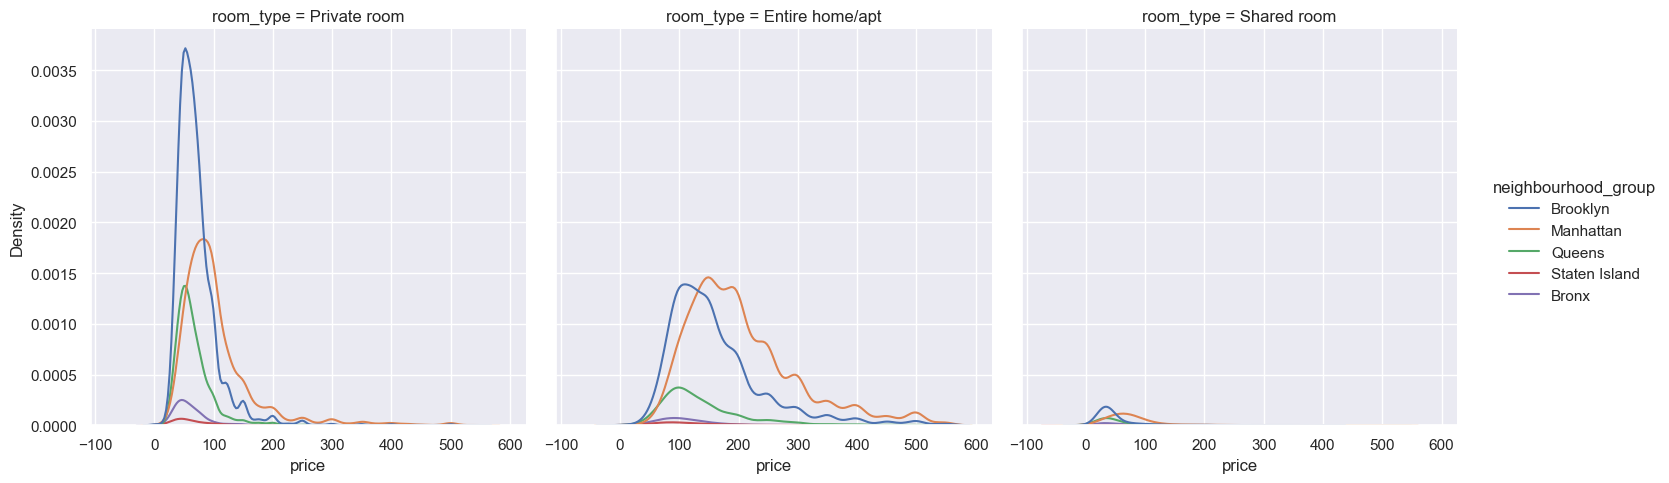

In [72]:
# g = sns.FacetGrid(df2, col="room_type",  row="neighbourhood_group")
# g.map_dataframe(sns.histplot, x="price", stat="density")
sns.displot(df2, x="price",col="room_type",hue="neighbourhood_group", kind="kde")

<Axes: xlabel='neighbourhood_group', ylabel='price'>

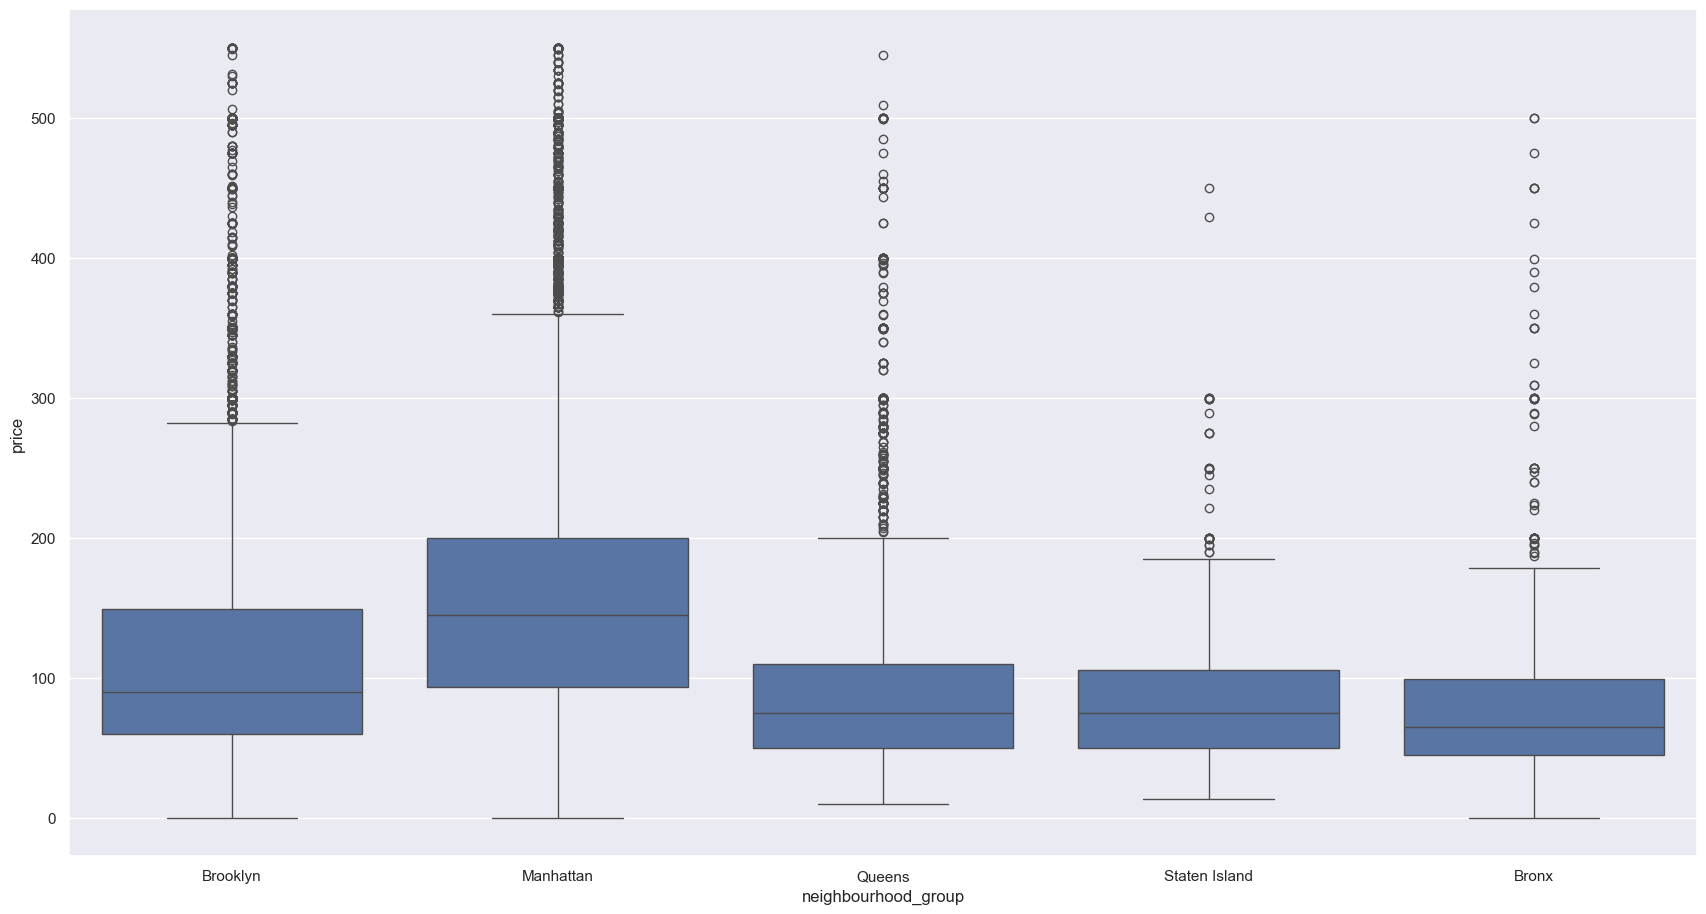

In [64]:
sns.boxplot(x = df2['neighbourhood_group'] , y = df2['price']) 

## Вывод №2
1. Стоимости съема комнаты в большей степени определяется типом комнаты
2. Манхэтон меет сымые высокие цены, как видно из графиков "ящик с усами"
3. Другие районы имеет примерные одинаковые средние велечины стоимости съема комнаты.

## Нормировка данных

In [1]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
sc=scaler.fit(df[['price']])
df['price_std']=sc.transform(df[['price']])[:,0]

In [21]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365     price_std  
count                    48895.000000      48895.000000  4.889500e+04  
mean                         7.143982        112.781327  3.720195e-17  
std                         32.952519        131.622289  1.000010e+00  
min                          1.000000          0.000000 -6.359342e-01  
25%                          1.000000          0.000000 -3.486158e-01  
50%                          1.000000         45.000000 -1.945465e-01  
75%                          2.000000        227.000000  9.277183e-02  
max                        327.000000        365.000000  4.100441e+01

## Цветовая визуализация отнормарованной цены на съем комнты

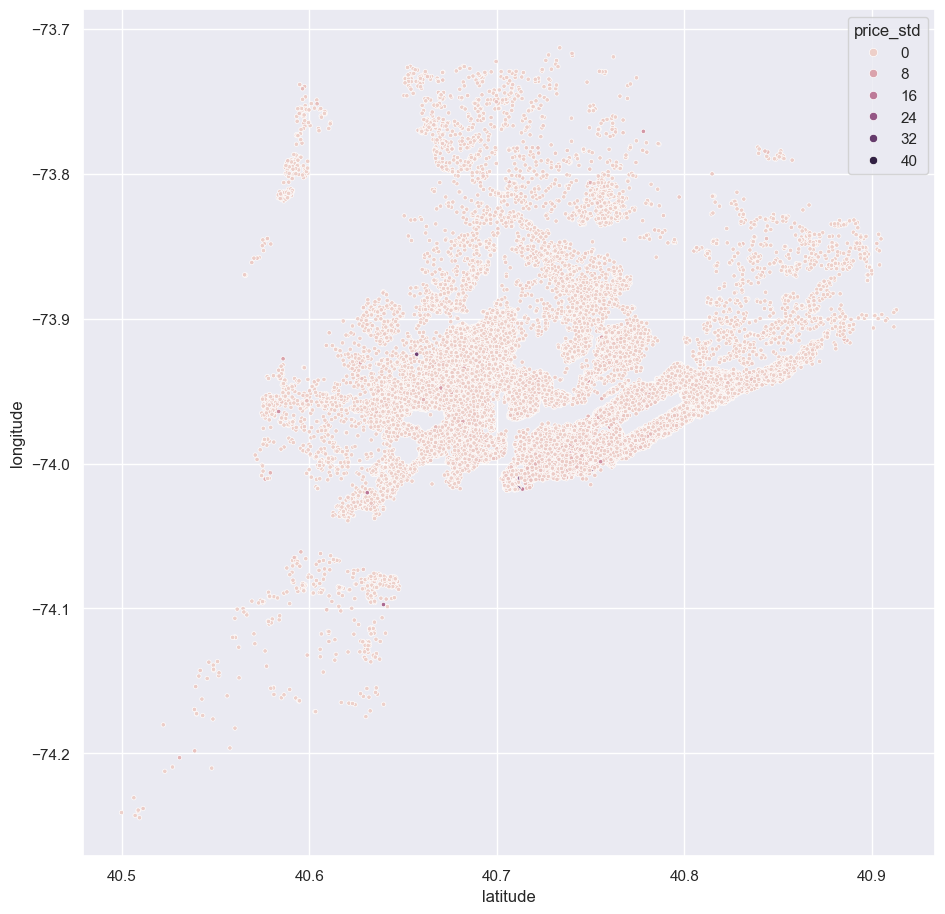

In [19]:
sns.set_theme(rc={'figure.figsize':(11,11)})
ax=sns.scatterplot(data=df, x="latitude", y="longitude", hue="price_std")
ax.collections[0].set_sizes([10])

## Фильтрация отнормированных данных, цветовое отображение

In [22]:
q98 = df['price_std'].quantile(0.98)

In [44]:
df3 = df.loc[df['price_std']<=q98]
df3

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  price_std  
0                   365  -0.015493  
1                   355   0.300974  
2                   365  -0.011329  
3                   194  -0.265335  
4                     0  -0.302811  
...                 ...        ...  
48890                 9  -0.344452  
48891                36  -0.469373  
48892           

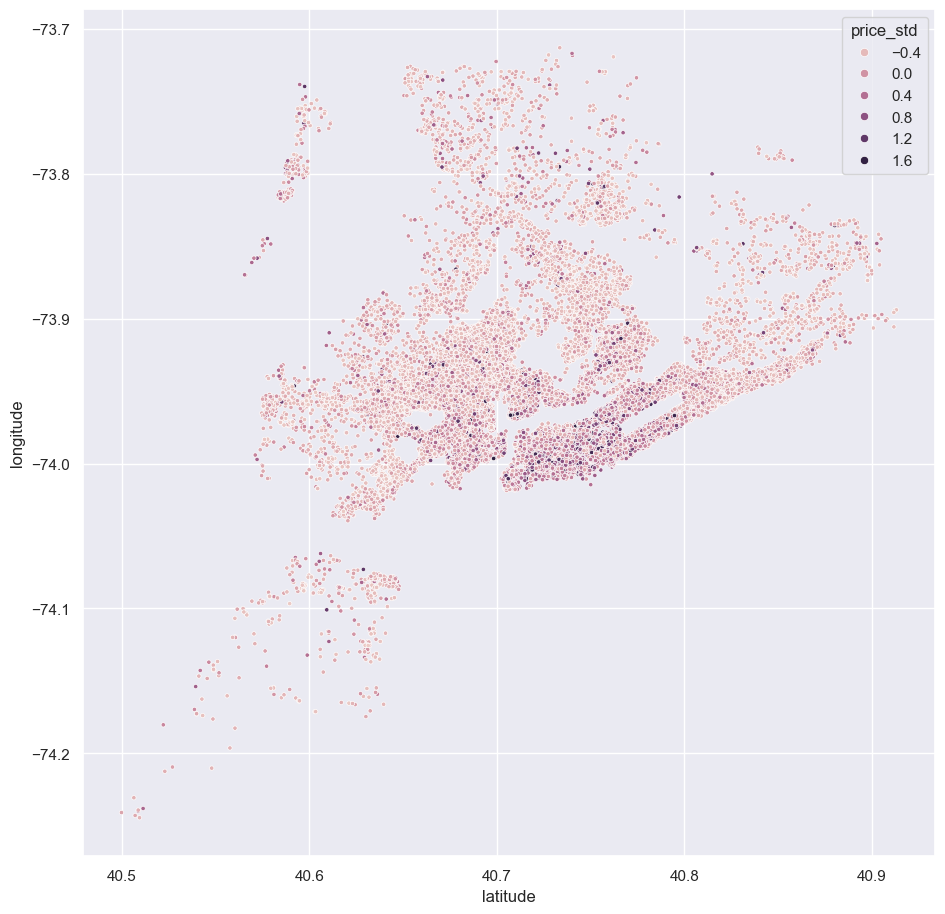

In [24]:
sns.set_theme(rc={'figure.figsize':(11,11)})
ax=sns.scatterplot(data=df3, x="latitude", y="longitude", hue="price_std")
ax.collections[0].set_sizes([10])

## Вывод №3
1. Нормировка данных не помогла выявить какие то закономерности
2. Фильтрация отнормированных данных показала те же самые результаты, что и ранее.

##  Усреднение  и отображение данных по "neighbourhood"

In [40]:
mean_values = df3[['neighbourhood','latitude','longitude','price_std']].groupby('neighbourhood').mean()
mean_values

latitude  longitude  price_std
neighbourhood                                   
Allerton         40.865292 -73.858727  -0.271185
Arden Heights    40.552410 -74.182253  -0.355903
Arrochar         40.593998 -74.075093  -0.263253
Arverne          40.591866 -73.794946  -0.026486
Astoria          40.764310 -73.919988  -0.222004
...                    ...        ...        ...
Willowbrook      40.598860 -74.132170   0.400910
Windsor Terrace  40.654612 -73.977990  -0.057160
Woodhaven        40.691968 -73.858232  -0.356234
Woodlawn         40.897421 -73.867939  -0.385714
Woodside         40.745925 -73.902723  -0.281584

[219 rows x 3 columns]

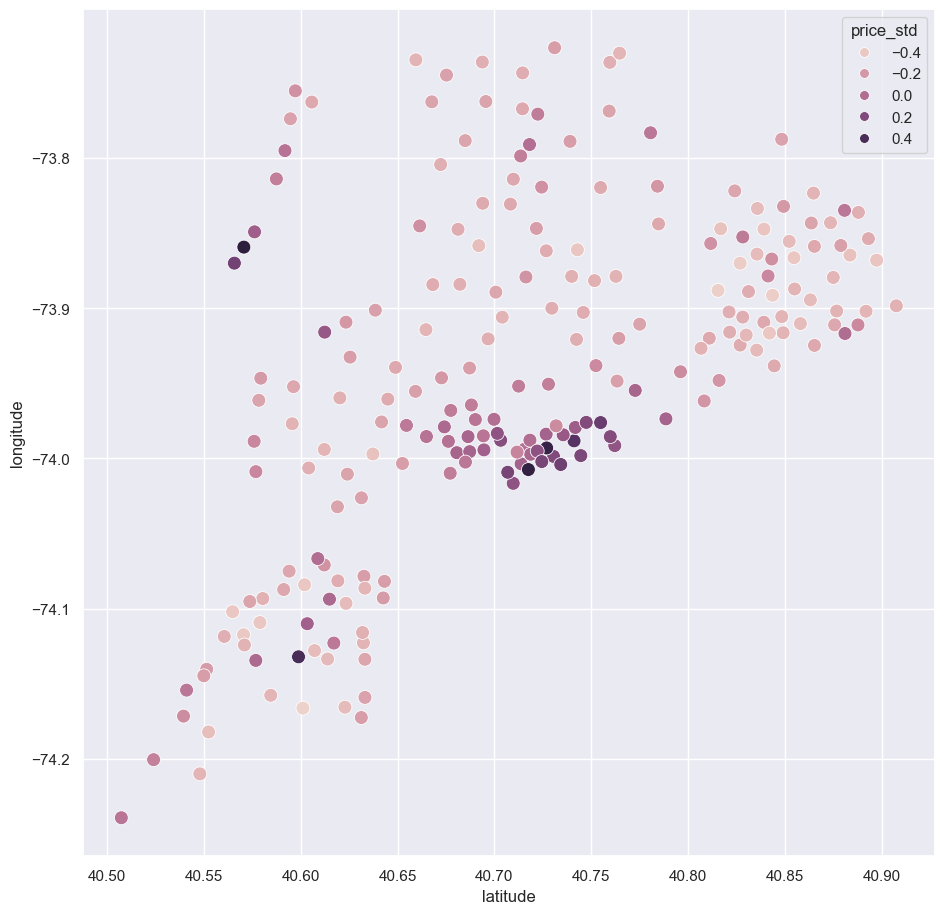

In [43]:
sns.set_theme(rc={'figure.figsize':(11,11)})
ax=sns.scatterplot(data=mean_values, x="latitude", y="longitude", hue="price_std")
ax.collections[0].set_sizes([100])

##  Усреднение  и отображение стоимости по "neighbourhood" и "neighbourhood_group"

In [46]:
mean_values = df3[['neighbourhood_group','latitude','longitude','price_std']].groupby('neighbourhood_group').mean()
mean_values

latitude  longitude  price_std
neighbourhood_group                                 
Bronx                40.848233 -73.884672  -0.295555
Brooklyn             40.685040 -73.951088  -0.164080
Manhattan            40.765542 -73.974303   0.049403
Queens               40.731568 -73.872848  -0.248659
Staten Island        40.610549 -74.105621  -0.256406

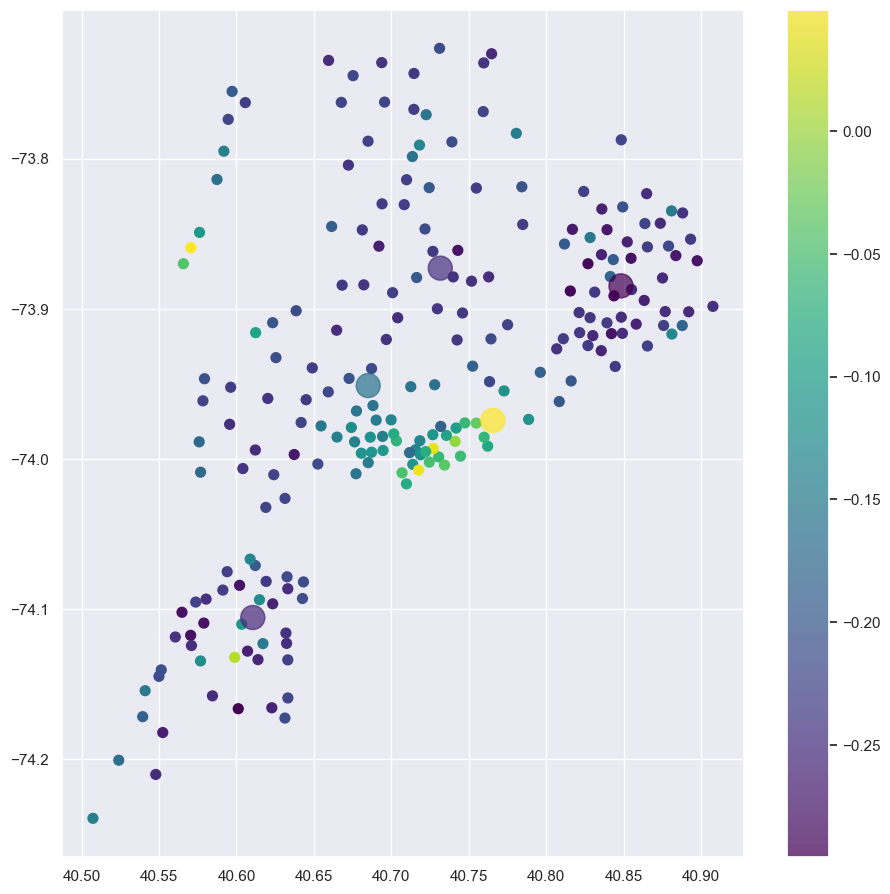

In [86]:
mean_values1 = df3[['neighbourhood','latitude','longitude','price_std']].groupby('neighbourhood').mean()

sizes = np.ones(mean_values1.shape[0]) * 50
plt.scatter(mean_values1['latitude'],mean_values1['longitude'], s=sizes, c=mean_values1['price_std'],cmap='viridis')

mean_values2 = df3[['neighbourhood_group','latitude','longitude','price_std']].groupby('neighbourhood_group').mean()

sizes = np.ones(mean_values2.shape[0]) * 300
plt.scatter(mean_values2['latitude'],mean_values2['longitude'], s=sizes, c=mean_values2['price_std'],alpha=0.7,cmap='viridis')

plt.colorbar()

##  Усреднение  и отображение стоимости по "neighbourhood" и "room_type"

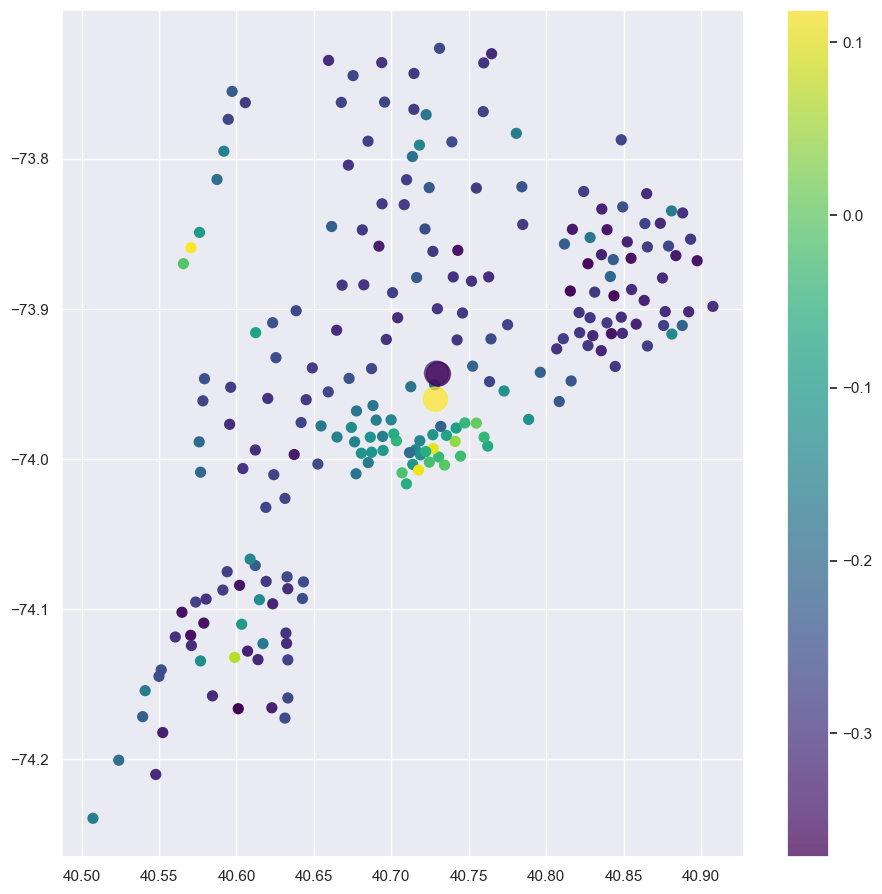

In [87]:
mean_values1 = df3[['neighbourhood','latitude','longitude','price_std']].groupby('neighbourhood').mean()

sizes = np.ones(mean_values1.shape[0]) * 50
plt.scatter(mean_values1['latitude'],mean_values1['longitude'], s=sizes, c=mean_values1['price_std'],cmap='viridis')

mean_values2 = df3[['room_type','latitude','longitude','price_std']].groupby('room_type').mean()

sizes = np.ones(mean_values2.shape[0]) * 300
plt.scatter(mean_values2['latitude'],mean_values2['longitude'], s=sizes, c=mean_values2['price_std'],alpha=0.7,cmap='viridis')

plt.colorbar()

##  Усреднение  и отображение стоимости по "neighbourhood", "neighbourhood_group" и "room_type"

In [88]:
mean_values3 = df3[['neighbourhood_group','room_type','latitude','longitude','price_std']].groupby(['room_type','neighbourhood_group']).mean()

In [89]:
mean_values3

latitude  longitude  price_std
room_type       neighbourhood_group                                 
Entire home/apt Bronx                40.848047 -73.880967  -0.125895
                Brooklyn             40.685206 -73.955487   0.034743
                Manhattan            40.758672 -73.978109   0.220660
                Queens               40.729114 -73.874679  -0.056613
                Staten Island        40.606270 -74.109191  -0.116116
Private room    Bronx                40.849078 -73.886056  -0.380792
                Brooklyn             40.685530 -73.947112  -0.338193
                Manhattan            40.776219 -73.968395  -0.203630
                Queens               40.732943 -73.871731  -0.356857
                Staten Island        40.614450 -74.103089  -0.376546
Shared room     Bronx                40.840122 -73.893056  -0.439166
                Brooklyn             40.669271 -73.948180  -0.432351
                Manhattan            40.770282 -73.971582  -0.285797
                Queens               40.734007 -73.872587  -0.430594
                Staten Island        40.609894 -74.091077  -0.396734

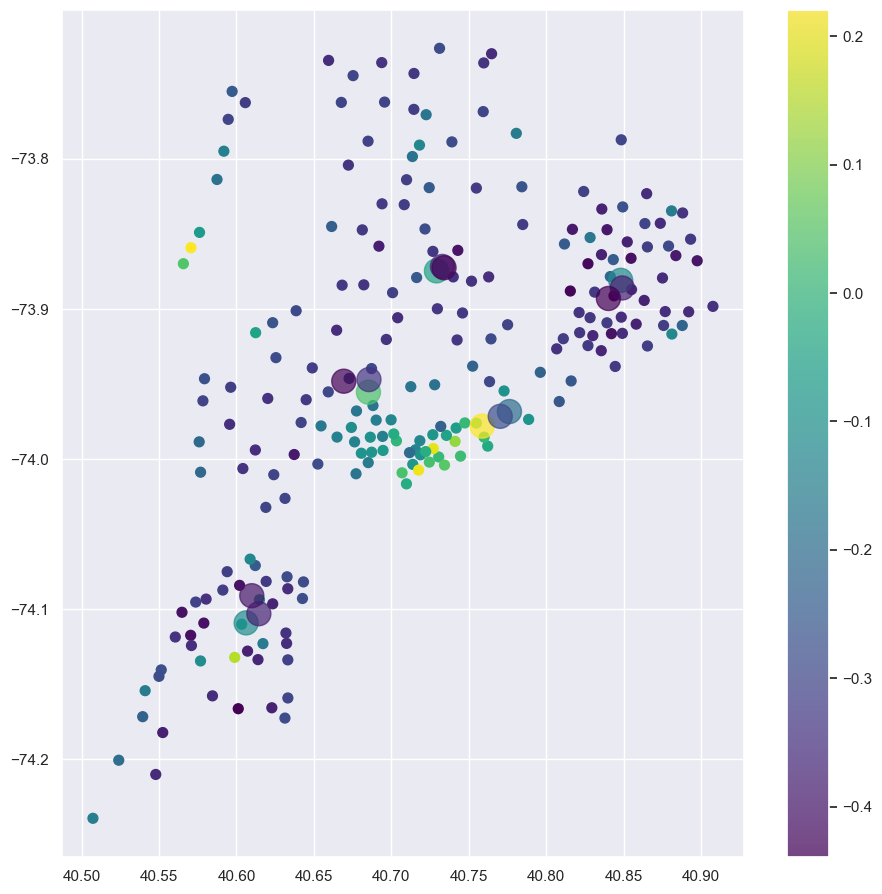

In [93]:
sizes = np.ones(mean_values1.shape[0]) * 50
plt.scatter(mean_values1['latitude'],mean_values1['longitude'], s=sizes, c=mean_values1['price_std'],cmap='viridis')
sizes = np.ones(mean_values3.shape[0]) * 300
plt.scatter(mean_values3['latitude'],mean_values3['longitude'], s=sizes, c=mean_values3['price_std'],alpha=0.7,cmap='viridis')
plt.colorbar()

##  Усреднение  и отображение стоимости по "neighbourhood", "neighbourhood_group" для "Entire home/apt"

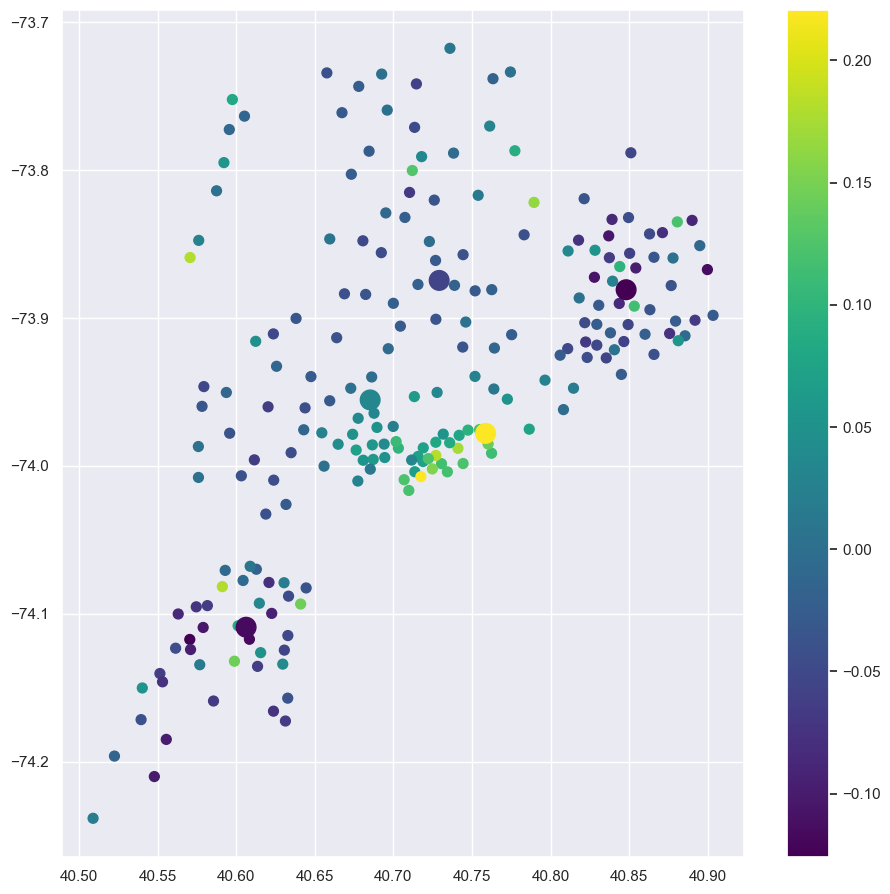

In [103]:
mean_values4 = df3.loc[df3['room_type']=='Entire home/apt'][['neighbourhood','latitude','longitude','price_std']].groupby('neighbourhood').mean()
mean_values5 = df3.loc[df3['room_type']=='Entire home/apt'][['neighbourhood_group','latitude','longitude','price_std']].groupby(['neighbourhood_group']).mean()
sizes = np.ones(mean_values4.shape[0]) * 50
plt.scatter(mean_values4['latitude'],mean_values4['longitude'], s=sizes, c=mean_values4['price_std'],cmap='viridis')
sizes = np.ones(mean_values5.shape[0]) * 200
plt.scatter(mean_values5['latitude'],mean_values5['longitude'], s=sizes, c=mean_values5['price_std'],cmap='viridis')
plt.colorbar()

##  Усреднение  и отображение стоимости по "neighbourhood", "neighbourhood_group" для "Private room"

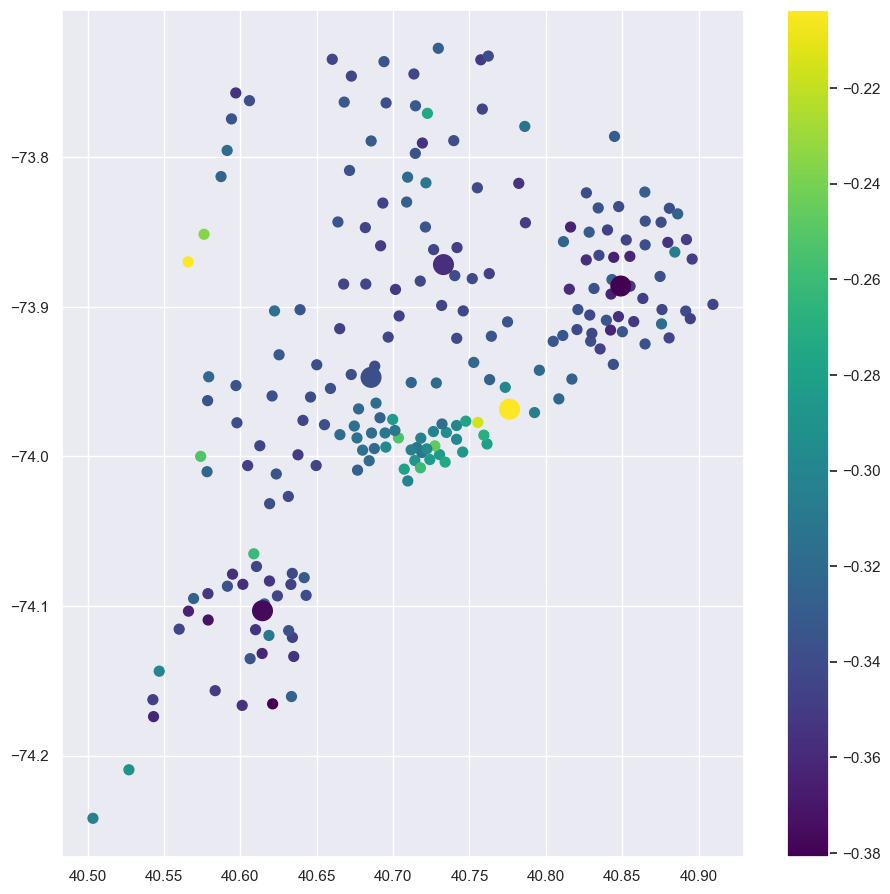

In [105]:
mean_values6 = df3.loc[df3['room_type']=='Private room'][['neighbourhood','latitude','longitude','price_std']].groupby('neighbourhood').mean()
mean_values7 = df3.loc[df3['room_type']=='Private room'][['neighbourhood_group','latitude','longitude','price_std']].groupby(['neighbourhood_group']).mean()
sizes = np.ones(mean_values6.shape[0]) * 50
plt.scatter(mean_values6['latitude'],mean_values6['longitude'], s=sizes, c=mean_values6['price_std'],cmap='viridis')
sizes = np.ones(mean_values7.shape[0]) * 200
plt.scatter(mean_values7['latitude'],mean_values7['longitude'], s=sizes, c=mean_values7['price_std'],cmap='viridis')
plt.colorbar()

##  Усреднение  и отображение стоимости по "neighbourhood", "neighbourhood_group" для "Shared room"

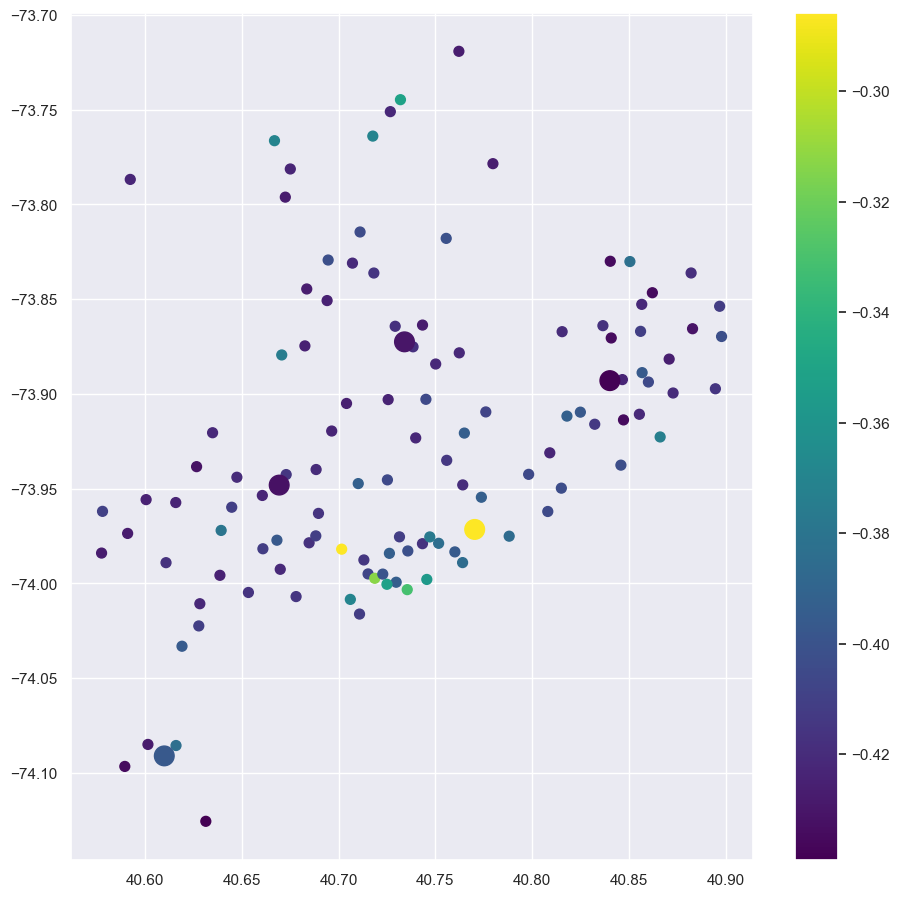

In [107]:
mean_values8 = df3.loc[df3['room_type']=='Shared room'][['neighbourhood','latitude','longitude','price_std']].groupby('neighbourhood').mean()
mean_values9 = df3.loc[df3['room_type']=='Shared room'][['neighbourhood_group','latitude','longitude','price_std']].groupby(['neighbourhood_group']).mean()
sizes = np.ones(mean_values8.shape[0]) * 50
plt.scatter(mean_values8['latitude'],mean_values8['longitude'], s=sizes, c=mean_values8['price_std'],cmap='viridis')
sizes = np.ones(mean_values9.shape[0]) * 200
plt.scatter(mean_values9['latitude'],mean_values9['longitude'], s=sizes, c=mean_values9['price_std'],cmap='viridis')
plt.colorbar()

## Вывод №4
1. Центр координат для разных типов комнат находятся близко к друг другу для каждого района, соответсвенно можно смело брать тип комнаты для прогноза стоимости комнаты для каждого района.
2. Цены в общем определяются районом, но цена в нутри района имеет какой то сложный характер.
3. Главнй вывод, который можно сделать - линейна модель будет работать плохо, если брать коордигаты комнаты
или растояние от Манхетона +  тип комнаты, так как характер стоимости носит более сложный характер.

Для прогноза, будем брать следующие параметры.
1. Тип комнаты.
2. Растояние от Манхетона по широте и долготе.
3. Произведение растояния от Манхетона по широте и долготе.

In [144]:
df4 = pd.get_dummies(df3[['room_type','latitude','longitude','price_std']])

In [145]:
df4

latitude  longitude  price_std  room_type_Entire home/apt  \
0      40.64749  -73.97237  -0.015493                      False   
1      40.75362  -73.98377   0.300974                       True   
2      40.80902  -73.94190  -0.011329                      False   
3      40.68514  -73.95976  -0.265335                       True   
4      40.79851  -73.94399  -0.302811                       True   
...         ...        ...        ...                        ...   
48890  40.67853  -73.94995  -0.344452                      False   
48891  40.70184  -73.93317  -0.469373                      False   
48892  40.81475  -73.94867  -0.157070                       True   
48893  40.75751  -73.99112  -0.406912                      False   
48894  40.76404  -73.98933  -0.261171                      False   

       room_type_Private room  room_type_Shared room  
0                        True                  False  
1                       False                  False  
2                        True                  False  
3                       False                  False  
4                       False                  False  
...                       ...                    ...  
48890                    True                  False  
48891                    True                  False  
48892                   False                  False  
48893                   False                   True  
48894                    True                  False  

[47960 rows x 6 columns]

In [131]:
mean_values9.iloc[0]

latitude     40.840122
longitude   -73.893056
price_std    -0.439166
Name: Bronx, dtype: float64

In [149]:
Manhattan = mean_values9.loc[['Manhattan']][['latitude','longitude']]
Manhattan

latitude  longitude
neighbourhood_group                      
Manhattan            40.770282 -73.971582

In [150]:
df4['latitude'] = df4['latitude']-Manhattan['latitude'].values[0]
df4['longitude'] = df4['longitude']-Manhattan['longitude'].values[0]
df4

latitude  longitude  price_std  room_type_Entire home/apt  \
0     -0.122792  -0.000788  -0.015493                      False   
1     -0.016662  -0.012188   0.300974                       True   
2      0.038738   0.029682  -0.011329                      False   
3     -0.085142   0.011822  -0.265335                       True   
4      0.028228   0.027592  -0.302811                       True   
...         ...        ...        ...                        ...   
48890 -0.091752   0.021632  -0.344452                      False   
48891 -0.068442   0.038412  -0.469373                      False   
48892  0.044468   0.022912  -0.157070                       True   
48893 -0.012772  -0.019538  -0.406912                      False   
48894 -0.006242  -0.017748  -0.261171                      False   

       room_type_Private room  room_type_Shared room  
0                        True                  False  
1                       False                  False  
2                        True                  False  
3                       False                  False  
4                       False                  False  
...                       ...                    ...  
48890                    True                  False  
48891                    True                  False  
48892                   False                  False  
48893                   False                   True  
48894                    True                  False  

[47960 rows x 6 columns]

In [167]:
df4['latitude_longitude'] = df4['latitude']*df4['longitude']
df4['latitude2']= df4['latitude']*df4['latitude']
df4['longitude2']= df4['longitude']*df4['longitude']
df4

latitude  longitude  price_std  room_type_Entire home/apt  \
0     -0.122792  -0.000788  -0.015493                      False   
1     -0.016662  -0.012188   0.300974                       True   
2      0.038738   0.029682  -0.011329                      False   
3     -0.085142   0.011822  -0.265335                       True   
4      0.028228   0.027592  -0.302811                       True   
...         ...        ...        ...                        ...   
48890 -0.091752   0.021632  -0.344452                      False   
48891 -0.068442   0.038412  -0.469373                      False   
48892  0.044468   0.022912  -0.157070                       True   
48893 -0.012772  -0.019538  -0.406912                      False   
48894 -0.006242  -0.017748  -0.261171                      False   

       room_type_Private room  room_type_Shared room  latitude_longitude  \
0                        True                  False            0.000097   
1                       False                  False            0.000203   
2                        True                  False            0.001150   
3                       False                  False           -0.001007   
4                       False                  False            0.000779   
...                       ...                    ...                 ...   
48890                    True                  False           -0.001985   
48891                    True                  False           -0.002629   
48892                   False                  False            0.001019   
48893                   False                   True            0.000250   
48894                    True                  False            0.000111   

       latitude2    longitude2  
0       0.015078  6.213538e-07  
1       0.000278  1.485537e-04  
2       0.001501  8.810057e-04  
3       0.007249  1.397535e-04  
4       0.000797  7.613041e-04  
...          ...           ...  
48890   0.008419  4.679322e-04  
48891   0.004684  1.475462e-03  
48892   0.001977  5.249478e-04  
48893   0.000163  3.817436e-04  
48894   0.000039  3.150007e-04  

[47960 rows x 9 columns]

In [168]:
X = df4[['latitude', 'longitude','room_type_Entire home/apt','room_type_Private room','room_type_Shared room','latitude2','longitude2','latitude_longitude']]
Y = df4['price_std']
X,Y

(       latitude  longitude  room_type_Entire home/apt  room_type_Private room  \
 0     -0.122792  -0.000788                      False                    True   
 1     -0.016662  -0.012188                       True                   False   
 2      0.038738   0.029682                      False                    True   
 3     -0.085142   0.011822                       True                   False   
 4      0.028228   0.027592                       True                   False   
 ...         ...        ...                        ...                     ...   
 48890 -0.091752   0.021632                      False                    True   
 48891 -0.068442   0.038412                      False                    True   
 48892  0.044468   0.022912                       True                   False   
 48893 -0.012772  -0.019538                      False                   False   
 48894 -0.006242  -0.017748                      False                    True   
 
        room_t

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [170]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [171]:
line_model = LinearRegression().fit(X_train, Y_train)

In [172]:
Y_pred = line_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Ошибка сред зн: {mse}")

Ошибка сред зн: 0.08519370102913035


In [173]:
X0 = df4[['latitude', 'longitude','room_type_Entire home/apt','room_type_Private room','room_type_Shared room']]
Y0 = df4['price_std']
X_train0, X_test0, Y_train0, Y_test0 = train_test_split(X0, Y0, test_size=0.3, random_state=42)

In [174]:
line_model0 = LinearRegression().fit(X_train0, Y_train0)

In [175]:
Y_pred0 = line_model0.predict(X_test0)
mse0 = mean_squared_error(Y_test0, Y_pred0)
print(f"Ошибка сред зн: {mse0}")

Ошибка сред зн: 0.09069379111845896


## Вывод №4
1. MSE ошибка для линейной модели составляет 0.090693, MSE для нелинейной медли составляет 0.085, что подверждает предыдущее предположение.
2. Для увеличения точности предсказания, необходимо вводить дополнительные параметры, которые характеризуют стоимость комнаты в каждом районе.
